<a href="https://colab.research.google.com/github/channeladam/MOOCs/blob/master/SchoolOfAI/DataLit/Week02/5-Homework-AnalysingData-Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [0]:
import pandas as pd
import numpy as np

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.dpi'] = 200

import seaborn as sns

from IPython.core.pylabtools import figsize

from google.colab import files

In [2]:
!wget "https://raw.githubusercontent.com/channeladam/MOOCs/master/SchoolOfAI/DataLit/Week02/data/formatted_flights.csv"

--2019-02-09 13:00:37--  https://raw.githubusercontent.com/channeladam/MOOCs/master/SchoolOfAI/DataLit/Week02/data/formatted_flights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10420748 (9.9M) [text/plain]
Saving to: ‘formatted_flights.csv.3’

formatted_flights.c 100%[===================>]   9.94M  --.-KB/s    in 0.08s   

2019-02-09 13:00:38 (120 MB/s) - ‘formatted_flights.csv.3’ saved [10420748/10420748]



In [3]:
!ls
!pwd

formatted_flights.csv	 formatted_flights.csv.2  sample_data
formatted_flights.csv.1  formatted_flights.csv.3
/content


In [4]:
flights = pd.read_csv('/content/formatted_flights.csv')
flights.head(10)

# Arrival Delay = from -60 to 120 minutes
# Name of airline

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317113 entries, 0 to 317112
Data columns (total 3 columns):
Unnamed: 0    317113 non-null int64
arr_delay     317113 non-null float64
name          317113 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 7.3+ MB


In [6]:
flights['arr_delay'].describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

Text(0, 0.5, 'Flights')

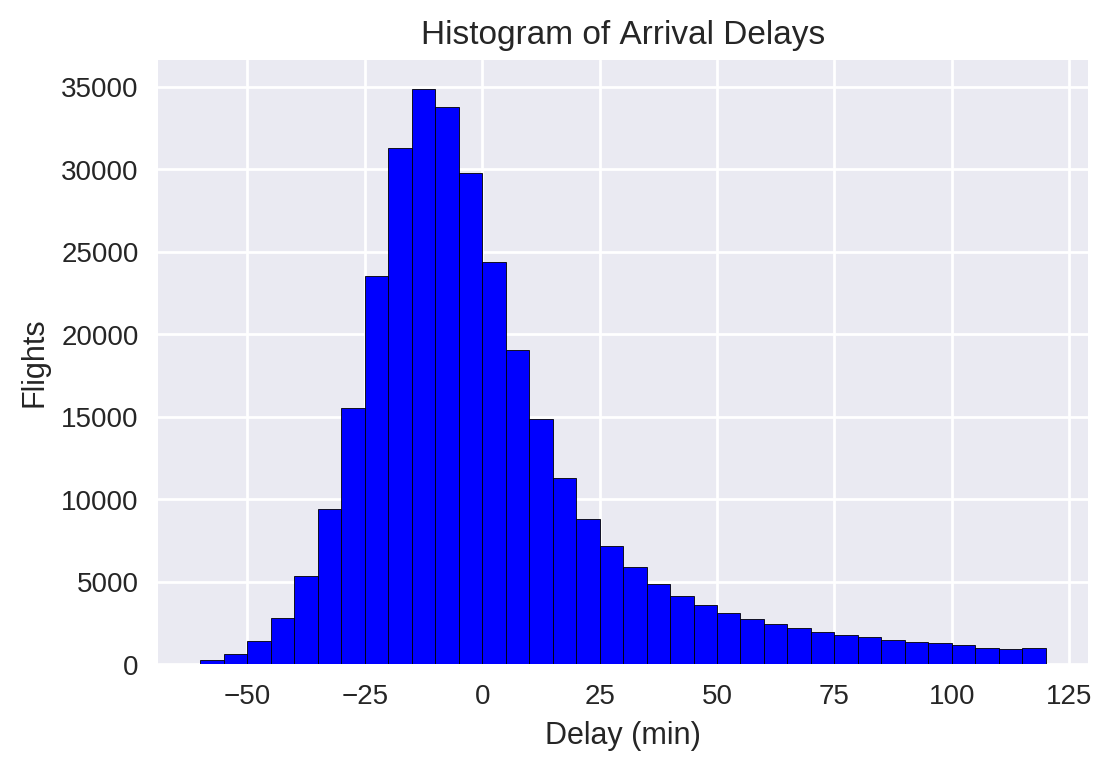

In [7]:
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black', bins = int(180/5))
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [8]:
flights['name'].value_counts()

United Air Lines Inc.          56359
JetBlue Airways                52267
ExpressJet Airlines Inc.       48641
Delta Air Lines Inc.           46468
American Airlines Inc.         31197
Envoy Air                      24327
US Airways Inc.                19547
Endeavor Air Inc.              16578
Southwest Airlines Co.         11588
Virgin America                  4920
AirTran Airways Corporation     3021
Alaska Airlines Inc.             689
Frontier Airlines Inc.           639
Mesa Airlines Inc.               513
Hawaiian Airlines Inc.           332
SkyWest Airlines Inc.             27
Name: name, dtype: int64

# Homework Part 2

**Demonstrate the Central Limit Theorem**

1. The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn

2. The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)

3. The spread of the sampling distribution is related to the spread of the population values 

4. Bigger samples lead to a smaller spread in the sampling distribution


In [150]:
delays = flights['arr_delay']

delays_desc = delays.describe().reset_index()
delays_desc.columns = ['stat','delay']
delays_desc

,stat,delay
0,count,317113.000000
1,mean,1.297143
2,std,29.064401
3,min,-60.000000
4,25%,-17.000000
5,50%,-6.000000
6,75%,11.000000
7,max,120.000000


In [151]:
pop_mean = delays_desc.loc[delays_desc.stat == 'mean']['delay'].get_values()[0]
print('Populate mean is ' + str(pop_mean))

pop_std = delays_desc.loc[delays_desc.stat == 'std']['delay'].get_values()[0]
print('Populate stddev is ' + str(pop_std))

Populate mean is 1.2971432896160044
Populate stddev is 29.064401023259187


In [0]:
def sample(num):
  results = pd.DataFrame({'mean':[], 'std':[], 'var':[]})

  for i in range(1,num):
  
    sample_df = delays.sample(frac=0.5, random_state=i)

  #  agg = sample_df.agg(['mean', 'std', 'var']).reset_index()
  #  agg.columns = ['stat', 'delay']
  #  mean = agg.loc[agg.stat == 'mean']['delay'].get_values()[0]
  #  std = agg.loc[agg.stat == 'std']['delay'].get_values()[0]
  #  var = agg.loc[agg.stat == 'var']['delay'].get_values()[0]

    mean = sample_df.mean()
    std = sample_df.std()
    var = sample_df.var()
    agg_df = pd.DataFrame({ 'mean':mean, 'std':std, 'var':var }, index=[i])

    results = results.append(agg_df)
  
  return results

In [0]:
def sample_and_analyse(num):

  results = sample(num)

  figsize(6,3)
  
  sns.distplot(results['mean'], hist=True, kde=False, bins = int(180/5),
               kde_kws = {'shade': True, 'linewidth': 3},
               label = 'Means of Samples')
  
  plt.legend(prop={'size': 16}, title = '')
  plt.title('Histogram of Mean Arrival Delays - %i samples' % num)
  plt.xlabel('Mean Delay (min) - should be close to population mean ' + str(pop_mean))
  plt.ylabel('Count')
  plt.show()
   
  
  sample_mean = results['mean'].mean()
  mean_diff = sample_mean - pop_mean
  print('The Mean of the Sample Means is %f, which is %f from the Population mean' % (sample_mean, mean_diff) )

  sample_std = results['std'].mean()
  std_diff = sample_std - pop_std
  print('The Mean of the Sample Std Deviations is %f, which is %f from the Population standard deviation' % (sample_std, std_diff) )
  
  
  sns.distplot(results['std'], hist=True, kde=False, bins = int(180/5),
           kde_kws = {'shade': True, 'linewidth': 3},
           label = 'Std Deviation of Samples')

  plt.legend(prop={'size': 16}, title = '')
  plt.title('Histogram of Std Deviaion of Arrival Delays - %i samples' % num)
  plt.xlabel('Std Deviation of Delay (min) - should be close to population std dev ' + str(pop_std))
  plt.ylabel('Count')
  plt.show()


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


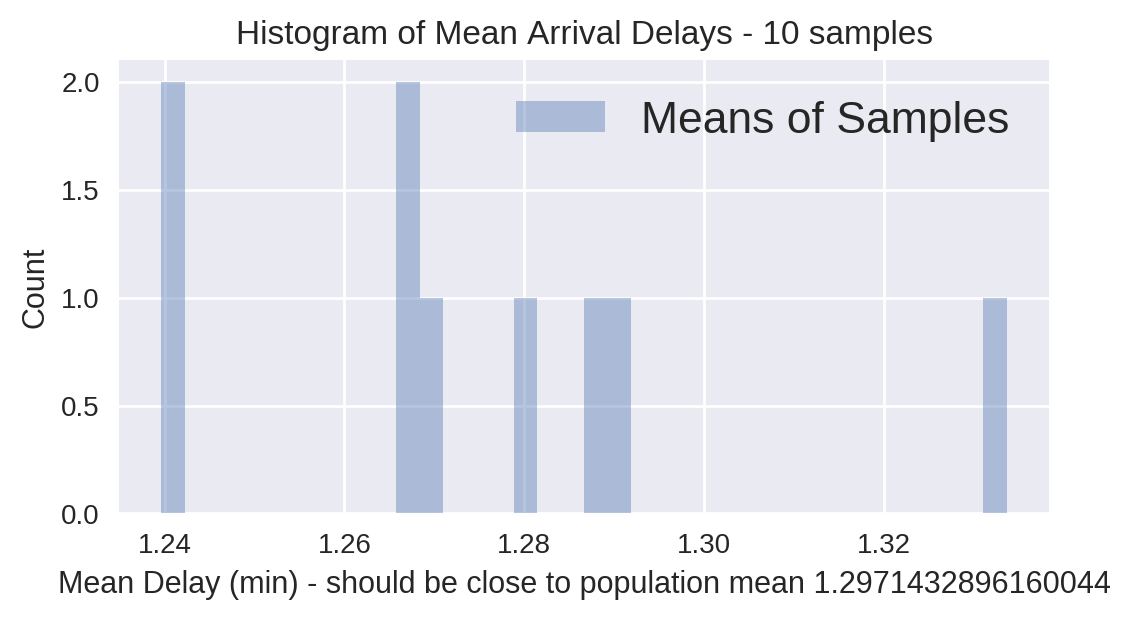

The Mean of the Sample Means is 1.275237, which is -0.021906 from the Population mean
The Mean of the Sample Std Deviations is 29.056886, which is -0.007515 from the Population standard deviation


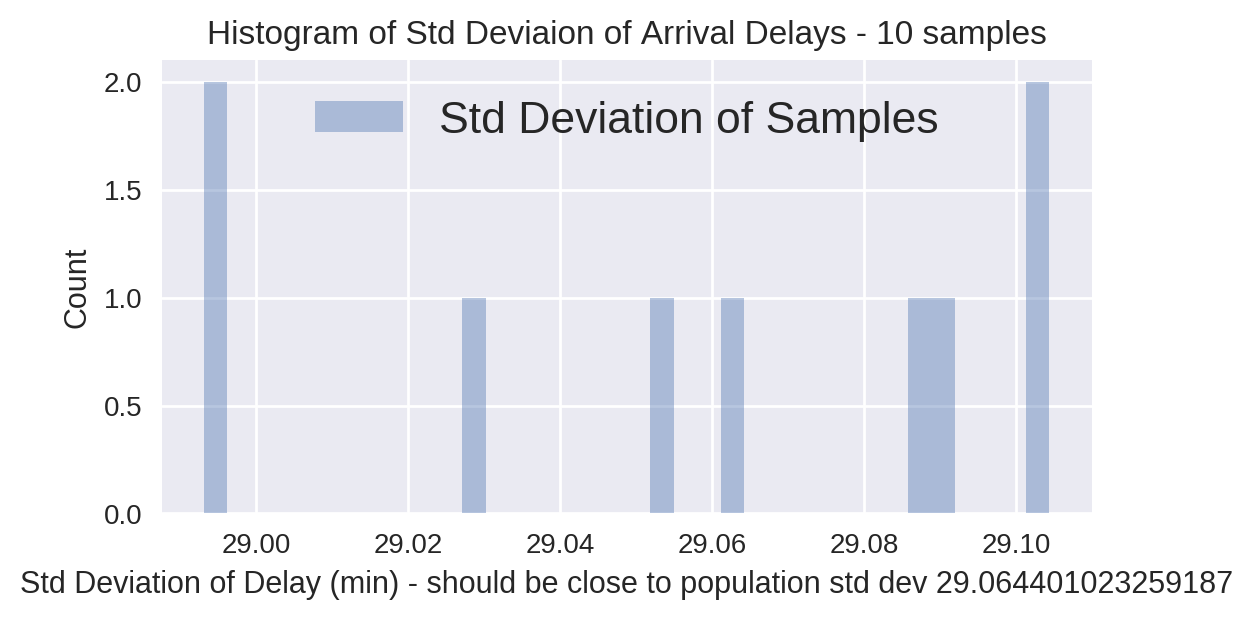

In [195]:
sample_and_analyse(10)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


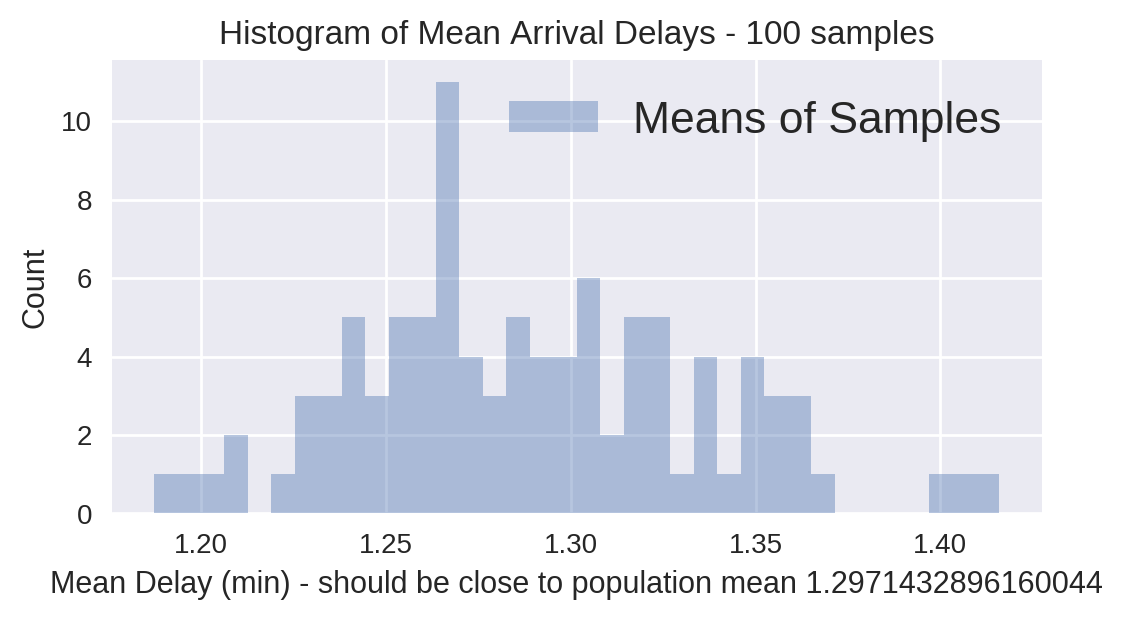

The Mean of the Sample Means is 1.289126, which is -0.008018 from the Population mean
The Mean of the Sample Std Deviations is 29.061426, which is -0.002975 from the Population standard deviation


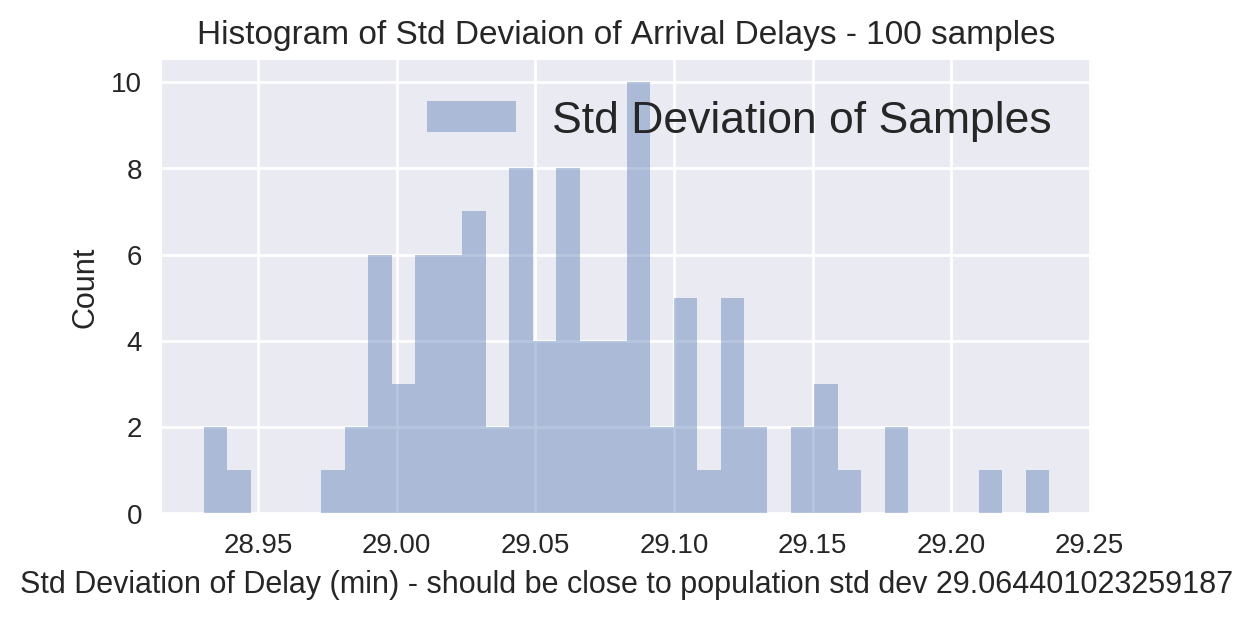

In [196]:
sample_and_analyse(100)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


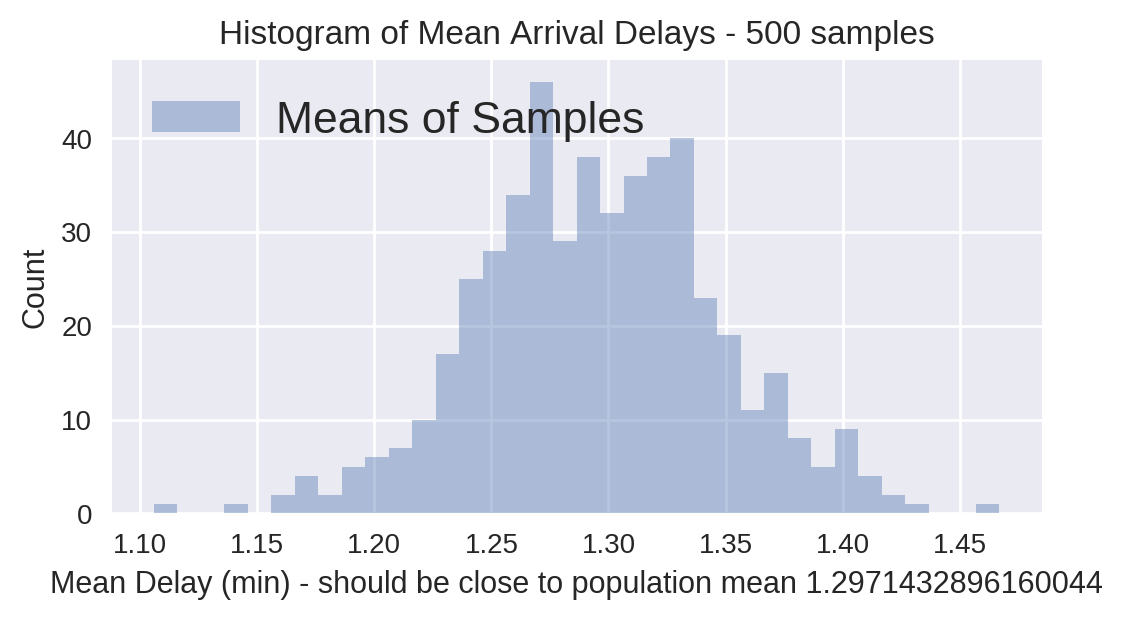

The Mean of the Sample Means is 1.295587, which is -0.001556 from the Population mean
The Mean of the Sample Std Deviations is 29.064828, which is 0.000427 from the Population standard deviation


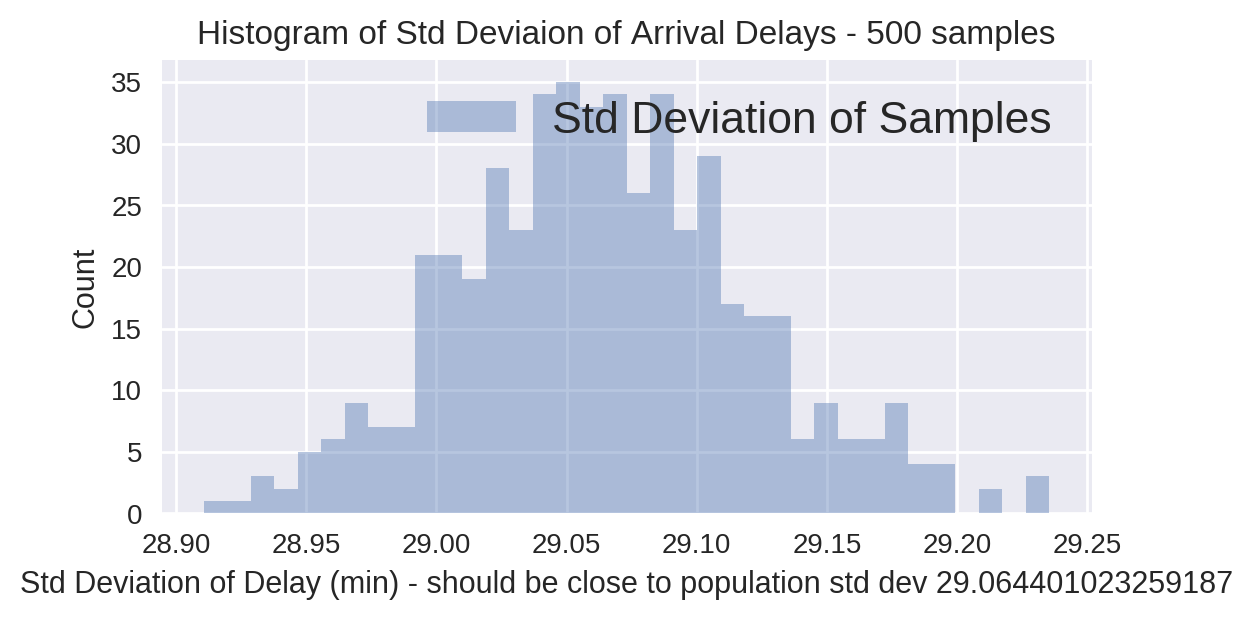

In [197]:
sample_and_analyse(500)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


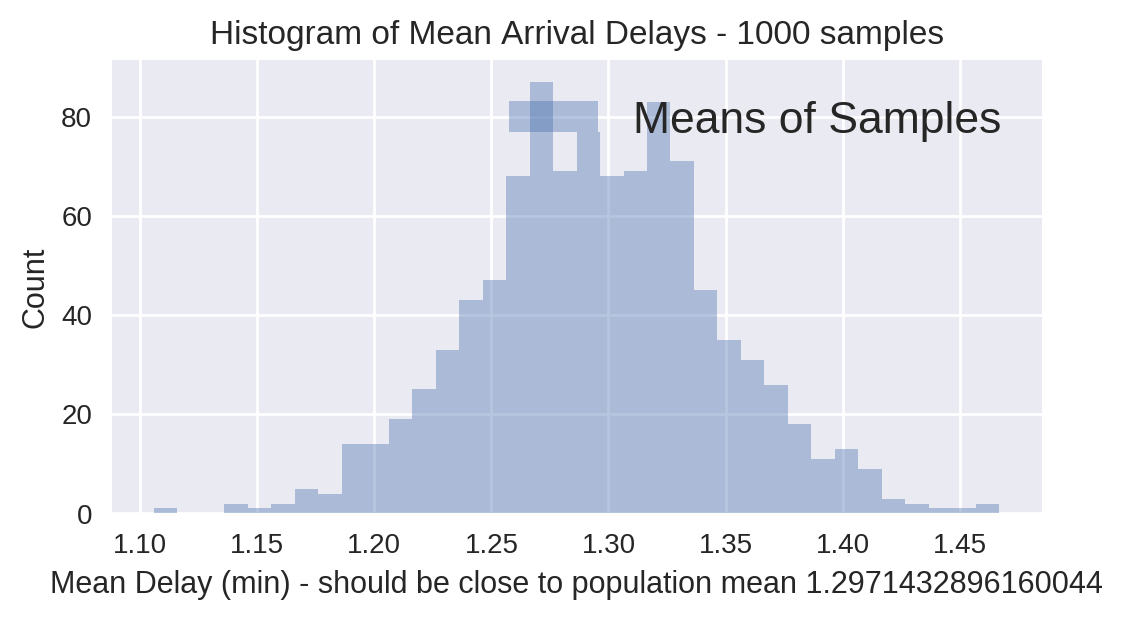

The Mean of the Sample Means is 1.295591, which is -0.001552 from the Population mean
The Mean of the Sample Std Deviations is 29.064078, which is -0.000323 from the Population standard deviation


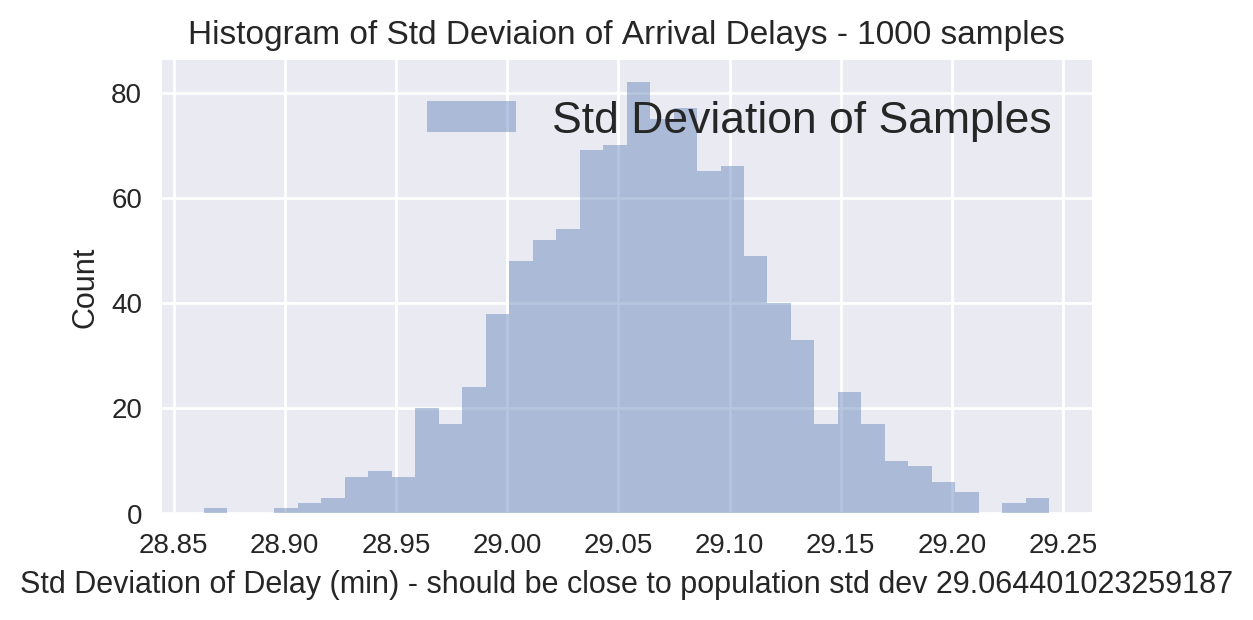

In [198]:
sample_and_analyse(1000)